In [18]:
import matplotlib.pyplot as plt
from stochax import GeometricBrownianMotion

<Axes: >

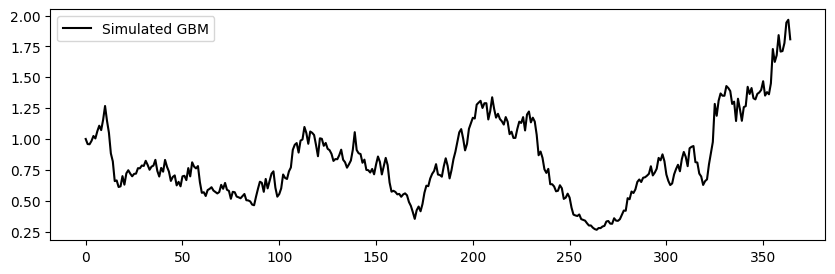

In [45]:
gbm = GeometricBrownianMotion(mu=1.0, sigma=1.5)
dt = 1 / 365
initial_value = 1
n_steps = 364

data = gbm.simulate(initial_value=initial_value, n_steps=n_steps, delta=dt)
data.columns = ['Simulated GBM']
data.plot(figsize=(10, 3), color='black')

In [46]:
res = gbm.calibrate(data, method="mle", delta=dt)
res

CalibrationResult(GeometricBrownianMotion(mu=1.7590631274119266, sigma=1.5268159746167482), observations.shape=(365, 1))

In [47]:
simulations = gbm.simulate(initial_value=initial_value, n_steps=n_steps, delta=dt, n_simulations=1000)

<Axes: >

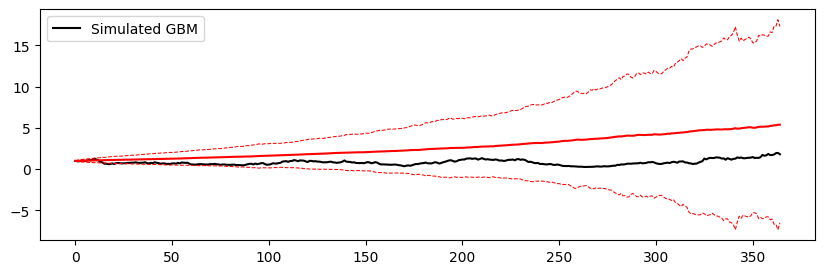

In [48]:
m = simulations.mean(axis=1)
s = simulations.std(axis=1)

fig, ax = plt.subplots(1, 1, figsize=(10, 3))
data.plot(color='black', ax=ax)
m.plot(color='red', ax=ax)
(m + s).plot(color='red', linestyle='dashed', linewidth=0.75)
(m - s).plot(color='red', linestyle='dashed', linewidth=0.75)

In [49]:

mask = ((m - s).values < data.values.flatten()) & (data.values.flatten() < (m + s).values)
sum(mask)/len(mask)

0.9808219178082191